In [73]:
# in terminal, run 'conda install geopandas'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gpd

In [74]:
# create GeoDataFrame of USA
# get these files from https://www.weather.gov/gis/USStates, download and extract the zip file
usa_gdf = gpd.read_file('C:/Users/Administrator/Desktop/s_05mr24')

In [75]:
# create GeoDataFrame of Michigan
MI_gdf = usa_gdf.loc[usa_gdf['STATE'] == 'MI']

In [76]:
# read in data
MI_weather_data_df = pd.read_csv('F:/Libraries/My Documents/UM/Milestone II/Weather_MI_2023.csv', low_memory=False)
power_data_df = pd.read_csv('C:/Users/Administrator/Desktop/MI_Plant_Location.csv')

In [77]:
# pull out the location data
MI_ws_df = MI_weather_data_df[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE']].drop_duplicates()
power_df = power_data_df[['Plant_Name', 'X', 'Y']].drop_duplicates()

In [78]:
# create GeoDataFrames of the weather stations and power plants
ws_gdf = gpd.GeoDataFrame(MI_ws_df, geometry=gpd.points_from_xy(MI_ws_df.LONGITUDE, MI_ws_df.LATITUDE))
ng_gdf = gpd.GeoDataFrame(power_df, geometry=gpd.points_from_xy(power_df.X, power_df.Y))

[None, None]

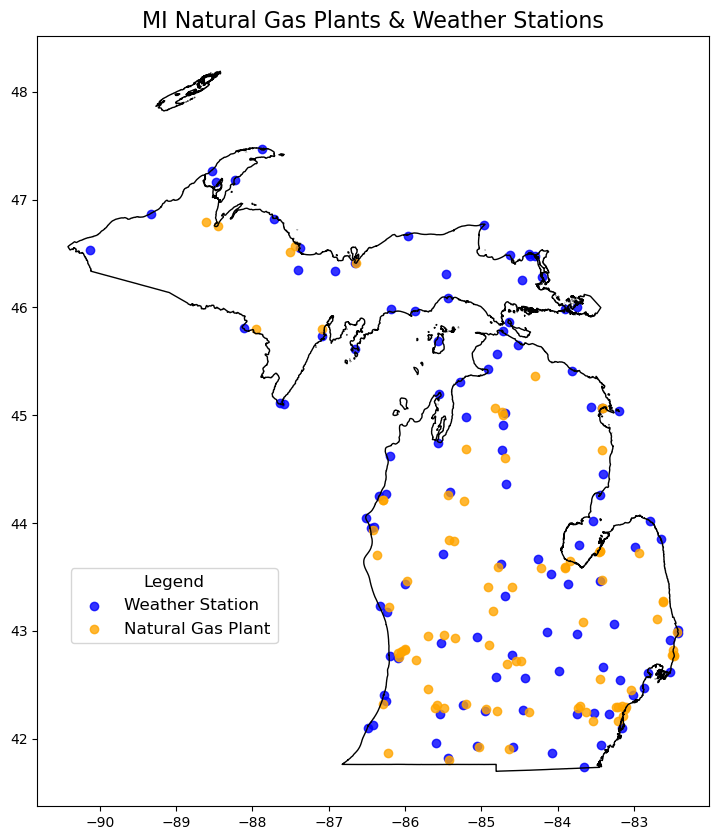

In [79]:
# set up the plot
my_fig, my_ax = plt.subplots(figsize=(10,10))
my_ax.set_title('MI Natural Gas Plants & Weather Stations', fontdict={'fontsize': '16'})

# draw the weather stations
ws_gdf.plot(ax=my_ax, color='blue', marker='o', alpha=0.8)

# draw the power plants
ng_gdf.plot(ax=my_ax, color='orange', marker='o', alpha=0.8)

# draw the map of Michigan
MI_gdf.plot(ax=my_ax, color='None', edgecolor='black')

# create the legend
legend = my_ax.legend(['Weather Station', 'Natural Gas Plant'], \
                      title='Legend', fontsize=12, \
                      bbox_to_anchor=(0.37, 0.32))
plt.setp(legend.get_title(), fontsize=12)